<a href="https://colab.research.google.com/github/rossmodolin/AluraDataScienceBootcamp/blob/main/module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**
The objective of this preliminary analysis is to draw some insights about how vaccinations take place in Brazil. In order to do that, data freely available on the [Ministry of Health's official website](http://www2.datasus.gov.br) was downloaded, and libraries such as pandas and matplotlib were used to filter and visualize the data.

## **1. Gathering the data**

### **1.1. Import and filter data**

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/rossmodolin/AluraDataScienceBootcamp/main/Module%201/vaccines_month_year_state.csv', encoding="ISO-8859-1", sep=";", index_col=0) # index_col=0 turns the first column into the index
pd.options.display.float_format = "{:.2f}".format

data.head(12)

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
Ano/mês,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994,1066655,247271,1060057,243144,2702656,0,0,3573421,1665626,3525002,892862,0,3433375,0,0,6099252,0,1296432,0,0,0,2942516,0,0,1019664,1017343,0,30785276
1995,1131629,532068,1713669,382307,2989578,199883,0,4516440,1440068,3454249,1124588,779729,6212277,1093767,1244236,4356615,0,2549855,4418954,2694310,3546002,2591758,4945493,0,1243724,2890781,8370,56060350
1996,1321580,381238,2330216,343973,3762019,217548,861857,3235673,1339793,4313033,1374695,1620745,6013353,1424137,1158405,5576198,0,1810593,3624884,2685627,3282837,2102093,4818668,624349,1195919,2956842,1059721,59435996
1997,1268726,750997,2714198,330366,5986769,342782,940661,4463053,1491053,5798538,1593657,3235523,6364081,1802078,1220961,7641690,10308837,1749539,7275325,12155615,6709434,2759330,4990553,1245403,2057182,3327562,1522637,100046550
1998,1529870,613288,3701986,636257,7379632,594037,1617472,5709568,1604822,4654166,1686305,2694232,5992067,1897345,1145494,8814911,11316601,3115713,7678953,21983469,4531876,3420888,4771179,1445619,3558030,4236982,1844074,118174836
1999,1409218,2095997,3090981,452054,8898969,623304,1972340,7880828,2170145,6716104,2113101,2761255,7849485,2746091,2026214,12098406,19681975,2709205,10757180,28686694,11553319,3689189,6822400,2044697,3358897,5227361,2275479,161710888
2000,1946752,897103,4375096,696255,9555755,801443,2015982,7946756,3569150,7282168,3076836,2640373,9532845,4181914,1871118,15148885,18771161,2649509,12023435,33610215,8916069,5197414,7238590,2660005,4221129,6895461,3547372,181268791
2001,1708077,803376,3627279,497155,7828208,950739,1563858,7062753,2755932,6207816,2398252,2778642,8956393,2831806,2151968,14990428,21661166,2989388,13904327,41813474,8484257,4286101,7925240,2223468,2931112,5310681,1884596,180526492
2002,1307970,730728,3437222,512151,10078315,699919,1576494,6196708,3079740,6112441,2486625,3083571,7879981,3767158,1700224,16724931,15768385,2287449,11594352,30439591,7459354,5113876,9210525,2902173,3063932,4480963,1659352,163354130


### **1.2. Check if there are any extra characters in the indexes**

In [ ]:
data.columns

Index(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB',
       'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS',
       'MT', 'GO', 'DF', ' Total'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.replace(' ', '')
data.columns

Index(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB',
       'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS',
       'MT', 'GO', 'DF', 'Total'],
      dtype='object')

### **1.3. Verify whether there are any missing values in the dataframe**

In [ ]:
# Boolean values are converted to False = 0 and True = 1 when we use .sum() (values are added per line, not per column)
# The second .sum() is used to sum all the lines

data.isnull().sum().sum()

0

### **1.4. Filter out rows or columns that do not contribute to the analysis**

In [ ]:
# I am not interested in the total number of vaccines per state, as the number of inhabitants varies widely;
# I will also filter out the row 2021/Dec as it refers to a future date, so there is no data available.

data_nototals = data.drop(['Total', '2021/Dez'], axis=0).drop('Total', axis=1)

# I am also going to start the analysis from 2004/Jan on, as before that there was no data available for each month, which may distort the graphs.

data_nototals = data_nototals.drop(data_nototals.index[0:10])
data_nototals.head()

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
Ano/mês,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004/Jan,59412,29835,141808,20276,284587,29143,68922,265793,156576,297450,97903,135971,315107,123281,71355,469544,665103,115375,483743,1365624,299192,161127,325751,89923,118989,196498,93742
2004/Fev,50286,30364,138303,33949,302455,19902,64348,264947,130772,267623,82450,119061,297906,127826,77855,564713,584212,116904,417159,1362285,277958,185406,320765,102077,119732,201018,81753
2004/Mar,63872,32685,135221,28186,303220,32661,70009,277182,166171,297632,113053,145846,329566,123912,75110,476363,738850,187086,499371,1409604,345190,162273,353542,112188,112438,195247,116443
2004/Abr,163641,73805,329101,40779,852200,55623,189502,747493,416994,929120,346444,472171,1007616,342370,211439,1605863,2436181,471767,1813756,4517822,1222325,639107,1315204,282813,295322,626945,229643
2004/Mai,98375,36327,180026,39234,394939,28364,69845,377103,131324,308501,96383,148328,338716,135245,84747,699803,845715,188356,505076,1909120,375125,189469,503212,111156,175458,251593,94605


### **1.5. Slice the dataframe per Brazilian region**

In [ ]:
north = data_nototals[['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO']]
northeast = data_nototals[['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']]
midwest = data_nototals[['MS', 'MT', 'GO', 'DF']]
southeast = data_nototals[['MG', 'ES', 'SP', 'RJ', 'ES']]
south = data_nototals[['PR', 'SC', 'RS']]


## **2. Visualizing the Data**

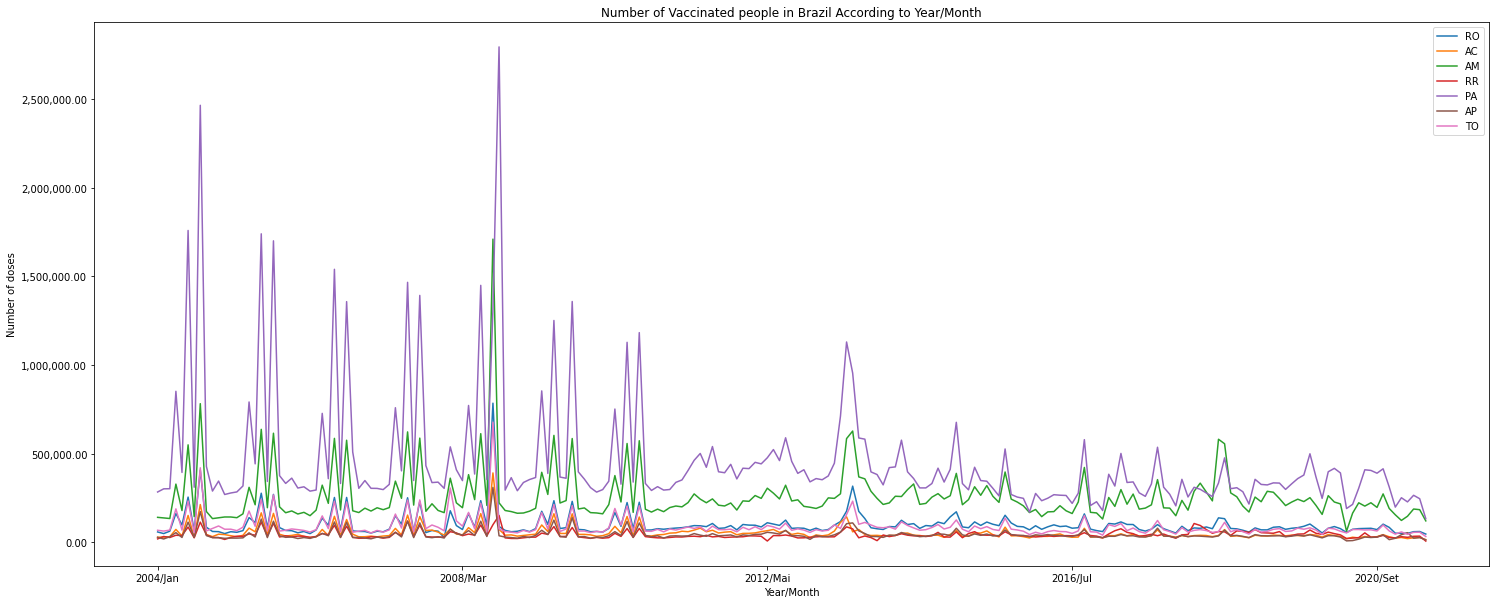

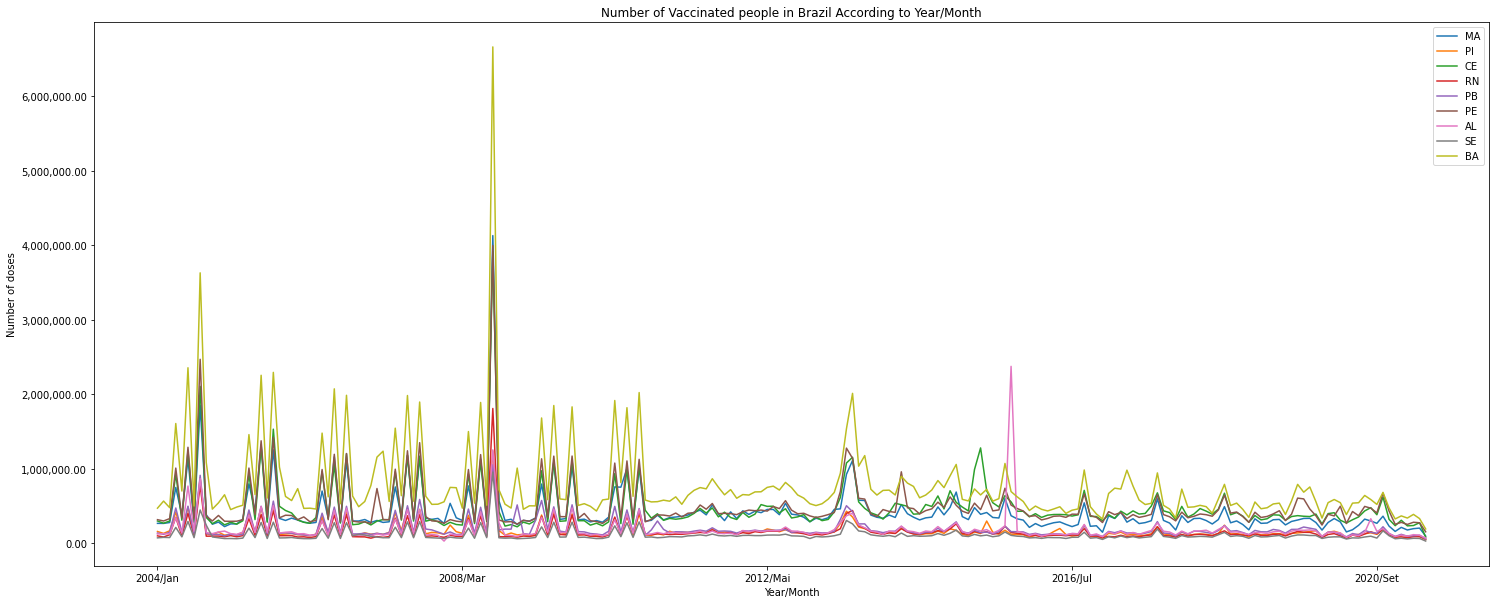

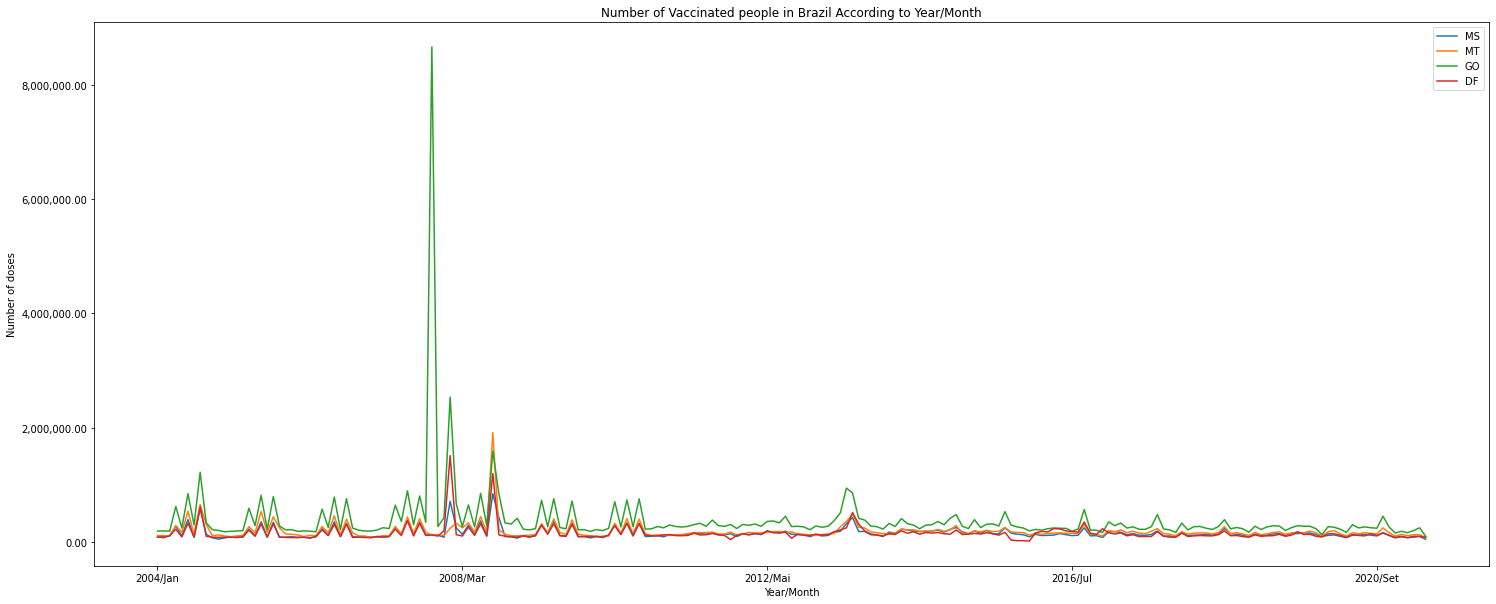

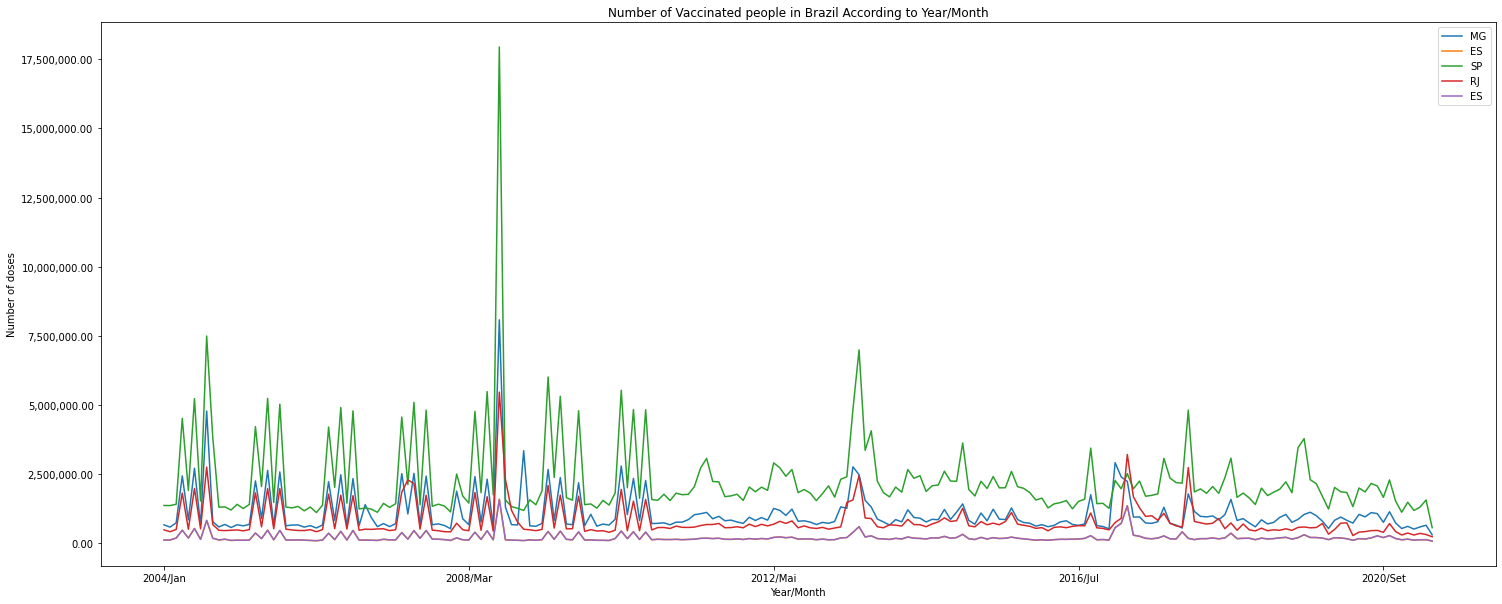

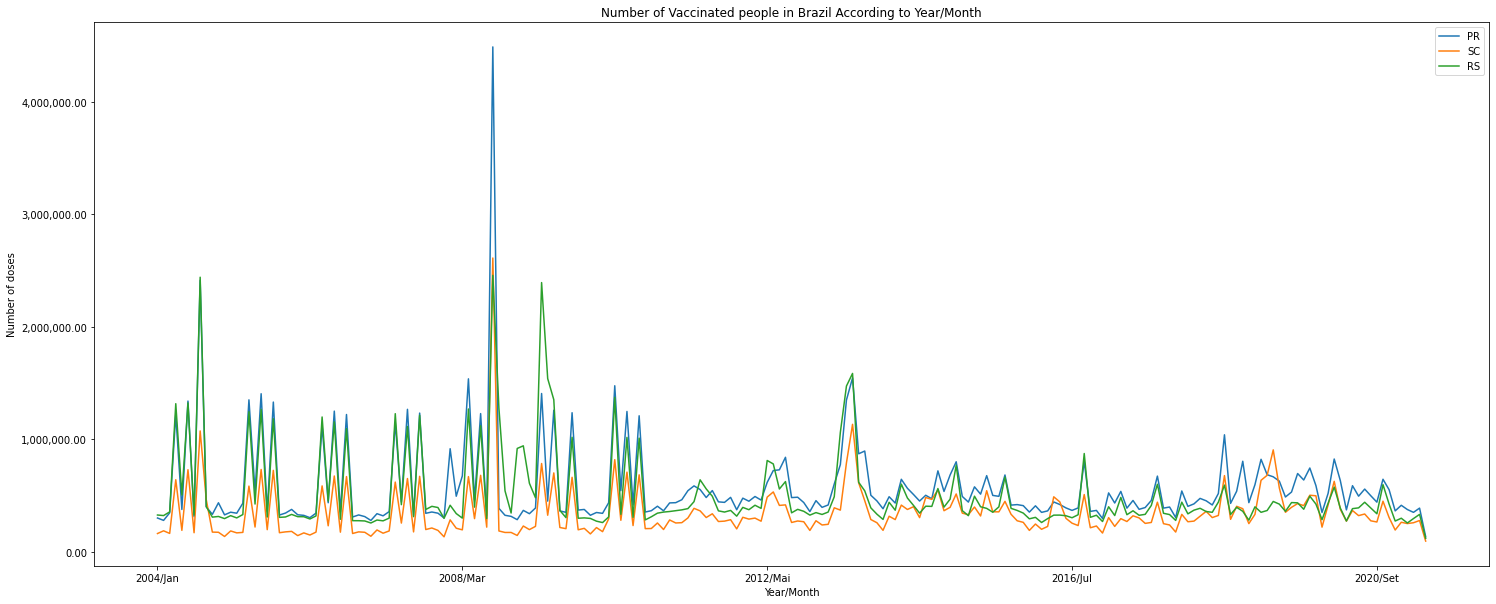

In [ ]:
# Sazonality of vaccines per region

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

regions = [north, northeast, midwest, southeast, south]

for region in regions:
  ax = region.plot(figsize=(25,10))
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
  ax.set_title("Number of Vaccinated people in Brazil According to Year/Month")
  ax.set_xlabel("Year/Month")
  ax.set_ylabel("Number of doses")
  plt.show()


## **6. Analysis**

**1.** The first point that catches our attention is the **spike** that can be observed **in the end of 2008**. This happens in all regions except the midwestern one, that had a similar spike, but in the previous year. According to articles from the [mainstream media](https://g1.globo.com/Noticias/Brasil/0,,MUL188789-5598,00-MINISTERIO+DA+SAUDE+PREPARA+VACINACAO+EM+MASSA+CONTRA+RUBEOLA.html) (in Brazilian Portuguese), **this was a campaign to vaccinate 68 million people against rubella**. Further analysis is necessary to identify whether this campaign started earlier in the midwestern region.


**2.** The second point that deserves comment is the **sazonality of vaccinations in Brazil**. The graphs show that a new cycle of vaccination starts every year, probably following the calendar established by the Ministry of Health. In order to find out which vaccines are given in each cycle would also require further analysis of the data available on the government's official website.




**3.** Finally, another point that is worth commenting is that **after 2010 this sazonality is not so clear anymore**. There are many reasons why this may have happened, but delving into the reasons behind this is not the scope of this brief analysis.